# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.style.use('classic')
plt.style.use('dark_background')
plt.rcParams['figure.autolayout'] = True

# Load data

In [2]:
header = ['tconst','titleType','startYear','primaryTitle','region','genre','averageRating', 'numVotes']

df = pd.read_csv('imdb_titles.csv', delimiter = ';', names = header)
df.head()

,tconst,titleType,startYear,primaryTitle,region,genre,averageRating,numVotes
0,tt0000001,short,1894,Carmencita,UA,Documentary,"5,7",1846
1,tt0000001,short,1894,Carmencita,UA,Short,"5,7",1846
2,tt0000001,short,1894,Carmencita,DE,Documentary,"5,7",1846
3,tt0000001,short,1894,Carmencita,DE,Short,"5,7",1846
4,tt0000001,short,1894,Carmencita,HU,Documentary,"5,7",1846


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6431723 entries, 0 to 6431722
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   titleType      object
 2   startYear      int64 
 3   primaryTitle   object
 4   region         object
 5   genre          object
 6   averageRating  object
 7   numVotes       int64 
dtypes: int64(2), object(6)
memory usage: 392.6+ MB


In [4]:
df.averageRating = df.averageRating.str.replace(',','.')
df.averageRating = df.averageRating.astype(float)

## TitleType

In [5]:
df_titleType = df.drop(['region','genre'], axis = 1)
df_titleType.drop_duplicates(inplace = True)
df_titleType

,tconst,titleType,startYear,primaryTitle,averageRating,numVotes
0,tt0000001,short,1894,Carmencita,5.7,1846
14,tt0000002,short,1892,Le clown et ses chiens,6.0,239
28,tt0000003,short,1892,Pauvre Pierrot,6.5,1615
52,tt0000004,short,1892,Un bon bock,6.0,155
64,tt0000005,short,1893,Blacksmith Scene,6.2,2437
...,...,...,...,...,...,...
6431666,tt9916460,tvMovie,2019,Pink Taxi,9.3,17
6431667,tt9916538,movie,2019,Kuambil Lagi Hatiku,8.3,6
6431668,tt9916544,short,2019,My Sweet Prince,7.1,49
6431670,tt9916720,short,2019,The Nun 2,5.4,167


In [6]:
len(set(df_titleType.titleType))

10

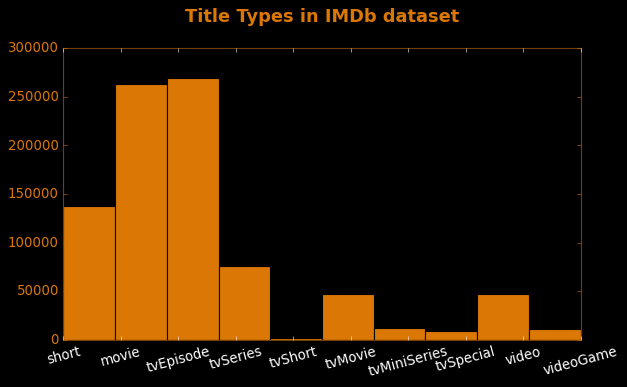

In [7]:
fig, ax = plt.subplots(1, figsize = (8,5))

ax.hist(df_titleType['titleType'], bins = 10, color='#db7705', edgecolor='black')

plt.setp(ax.spines.values(), color='#733f05')
ax.set_title('Title Types in IMDb dataset\n', weight = 'bold', size = 16, color = '#db7705')
ax.tick_params(axis='y', colors='#db7705')
ax.tick_params(axis='x', rotation = 15)
plt.show()

In [8]:
df_titleType_tv = df_titleType.copy()
df_titleType_tv['titleType'] = ['tv' if 'tv' in titletype else titletype for titletype in df_titleType.titleType ]

In [9]:
df_titleType_tv['titleType'].value_counts()

tv           416095
movie        263007
short        137789
video         47310
videoGame     11563
Name: titleType, dtype: int64

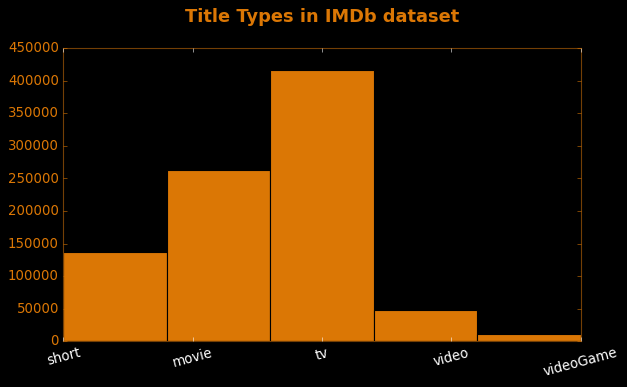

In [10]:
fig, ax = plt.subplots(1, figsize = (8,5))

ax.hist(df_titleType_tv['titleType'], bins = 5, color='#db7705', edgecolor='black')

plt.setp(ax.spines.values(), color='#733f05')
ax.set_title('Title Types in IMDb dataset\n', weight = 'bold', size = 16, color = '#db7705')
ax.tick_params(axis='y', colors='#db7705')
ax.tick_params(axis='x', rotation = 15)
plt.show()

## Genres

In [11]:
df_genres = df.drop(['region'], axis = 1)
df_genres.drop_duplicates(inplace = True)
df_genres.head()

,tconst,titleType,startYear,primaryTitle,genre,averageRating,numVotes
0,tt0000001,short,1894,Carmencita,Documentary,5.7,1846
1,tt0000001,short,1894,Carmencita,Short,5.7,1846
14,tt0000002,short,1892,Le clown et ses chiens,Animation,6.0,239
15,tt0000002,short,1892,Le clown et ses chiens,Short,6.0,239
28,tt0000003,short,1892,Pauvre Pierrot,Animation,6.5,1615


In [12]:
len(set(df_genres.genre))

28

In [13]:
df_genres.genre.value_counts()

Drama          326809
Comedy         258609
Short          140811
Documentary    107853
Action          98622
Crime           90327
Adventure       76355
Romance         74211
Animation       73709
Family          55515
Horror          42815
Mystery         42487
Thriller        42066
Fantasy         36110
Music           30839
Sci-Fi          25162
Reality-TV      24098
History         21136
Talk-Show       21119
Adult           19771
Biography       17995
Sport           15107
Game-Show       13547
Western         11077
War             10793
Musical         10359
News             9228
Film-Noir         762
Name: genre, dtype: int64

In [14]:
less_pop_genres = []
for x in range(len(set(df_genres.genre))):
    if df_genres.genre.value_counts()[x] < 25000:
        less_pop_genres.append(df_genres.genre.value_counts().index[x])

less_pop_genres

['Reality-TV',
 'History',
 'Talk-Show',
 'Adult',
 'Biography',
 'Sport',
 'Game-Show',
 'Western',
 'War',
 'Musical',
 'News',
 'Film-Noir']

In [15]:
df_genres_other = df_genres.copy()
df_genres_other['genre'] = ['Other' if genre in less_pop_genres else genre for genre in df_genres.genre]

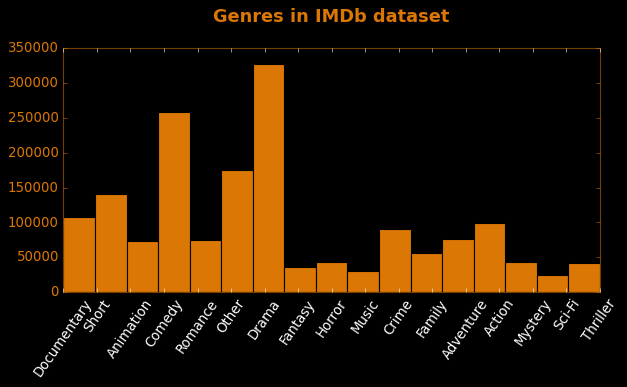

In [16]:
fig, ax = plt.subplots(1, figsize = (8,5))

plt.hist(df_genres_other['genre'], 
         bins = len(set(df_genres_other.genre)), 
         color='#db7705', 
         edgecolor='black')

plt.setp(ax.spines.values(), color='#733f05')
ax.set_title('Genres in IMDb dataset\n', weight = 'bold', size = 16, color = '#db7705')
ax.tick_params(axis='y', colors='#db7705')
ax.tick_params(axis='x', rotation = 55)
plt.show()

## Countries/Genres

Deciding which are the most prefered genres by country by using the "averageRating" feature generates an important bias as titles with very few votes are not representative and this is not reflected in the feature.

Moreover, the fact that some genres get a higher number of votes represent a higher interest for these genres, regardless of the average rating which judges the subjective "quality" of titles from these genres.

Finally, titles with higher number of votes also have a higher average rating.

In [17]:
df_lowVotes = df[(df['numVotes'] < 10)]
df_avgVotes = df[(df['numVotes'] > 15000) & (df['numVotes'] < 20000)]
df_popTitles = df[(df['numVotes'] > 1000000)]
df_allVotes = df['averageRating']

In [18]:
lowVotes = df_lowVotes['averageRating'].mean()
avgVotes = df_avgVotes['averageRating'].mean()
popTitles = df_popTitles['averageRating'].mean()
allVotes = df_allVotes.mean()

print('The average rating of a title in the dataset is {:.2f}\n\n'
      '\tTitles with very few votes (<10) get on average a {:.2f} rating\n'
      '\tTitles with around an average number of votes (15-20k) get a {:.2f} rating\n'
      '\tTitles with more than 1M votes get a rating of {:.2f}'.format(allVotes, lowVotes, avgVotes, popTitles))

The average rating of a title in the dataset is 6.62

	Titles with very few votes (<10) get on average a 7.05 rating
	Titles with around an average number of votes (15-20k) get a 6.71 rating
	Titles with more than 1M votes get a rating of 8.52


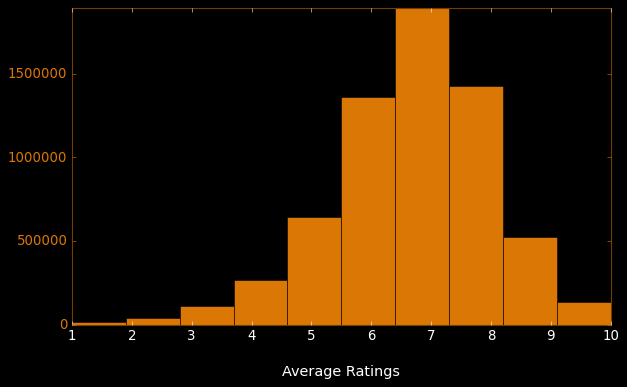

In [19]:
fig, ax = plt.subplots(1, figsize = (8,5))

df.averageRating.hist(color='#db7705', edgecolor='black', linewidth = 0.5)
plt.grid(visible = None)
plt.setp(ax.spines.values(), color='#733f05')
ax.set_xlabel('\nAverage Ratings', size = 13)
ax.tick_params(axis='y', colors='#db7705')
ax.tick_params(axis ='x')
ax.axis('tight')
plt.show()

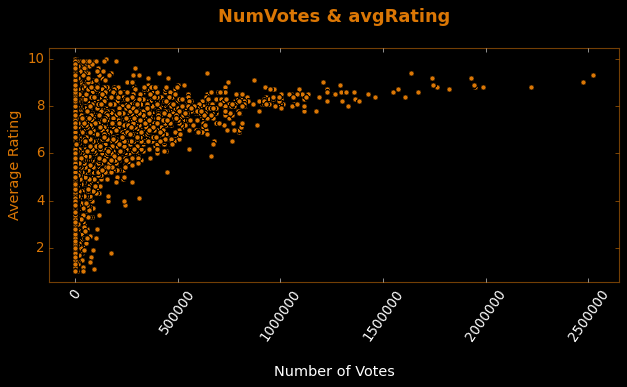

In [20]:
fig, ax = plt.subplots(1, figsize = (8,5))

plt.scatter(x = df['numVotes'], y = df['averageRating'], color='#db7705', edgecolor='black', linewidth = 0.5)

plt.setp(ax.spines.values(), color='#733f05')
ax.set_title('NumVotes & avgRating\n', weight = 'bold', size = 16, color = '#db7705')
ax.set_xlabel('\nNumber of Votes', size = 13)
ax.set_ylabel('Average Rating', size = 13, color = '#db7705')
ax.tick_params(axis='y', colors='#db7705')
ax.tick_params(axis ='x', rotation = 55)
ax.axis('tight')
plt.show()

### Evolution genre per Country by Year

In [21]:
df_countries_genres = df.groupby(['region','startYear','genre']).mean().sort_values(['region','startYear','numVotes'], 
                                                                                     ascending = False)
df_countries_genres.head(25)

averageRating  numVotes
region startYear genre                               
ZW     2021      Short                  9.5      13.0
       2020      Comedy                 4.8       9.0
                 Drama                  8.0       7.0
       2017      Romance                6.1     328.0
                 Comedy                 6.7     183.0
                 Action                 7.3      38.0
                 Adventure              7.3      38.0
       2015      Drama                  9.3       6.0
       2012      Biography              9.2      11.0
                 Documentary            9.2      11.0
                 History                9.2      11.0
       2011      Action                 8.3       9.0
                 Drama                  8.3       9.0
                 Family                 8.3       9.0
       2010      Documentary            6.1      15.0
       2006      Adventure              6.9      20.0
                 Animation              6.9      20.0
                 Comedy                 6.9      20.0
                 Drama                  5.6       9.0
                 Short                  5.6       9.0
       2005      Short                  6.6      17.0
       2004      Adventure              6.9       9.0
                 Animation              6.9       9.0
                 Comedy                 6.9       9.0
       2003      Adventure              6.3      56.0

In [22]:
df_countries_genres_bis = df_countries_genres.groupby(level=[0,1]).head(1)
df_countries_genres_bis.head(10)

averageRating  numVotes
region startYear genre                               
ZW     2021      Short                  9.5      13.0
       2020      Comedy                 4.8       9.0
       2017      Romance                6.1     328.0
       2015      Drama                  9.3       6.0
       2012      Biography              9.2      11.0
       2011      Action                 8.3       9.0
       2010      Documentary            6.1      15.0
       2006      Adventure              6.9      20.0
       2005      Short                  6.6      17.0
       2004      Adventure              6.9       9.0

In [23]:
df_countries_genres_bis.reset_index(level=['region','startYear','genre'], inplace = True)
df_countries_genres_bis.head()

,region,startYear,genre,averageRating,numVotes
0,ZW,2021,Short,9.5,13.0
1,ZW,2020,Comedy,4.8,9.0
2,ZW,2017,Romance,6.1,328.0
3,ZW,2015,Drama,9.3,6.0
4,ZW,2012,Biography,9.2,11.0


In [24]:
df_countries_genres_bis.genre.value_counts()

Sci-Fi         1219
Drama          1098
Comedy          760
Action          743
Adventure       707
Fantasy         589
Crime           569
Mystery         528
Thriller        488
Biography       483
Animation       458
War             452
Documentary     409
Horror          398
Western         334
Romance         299
Family          285
History         270
Film-Noir       185
Short           179
Musical         170
Sport           147
Music           138
News             14
Adult            12
Reality-TV        5
Talk-Show         3
Game-Show         2
Name: genre, dtype: int64

In [25]:
df_countries_genres_bis

,region,startYear,genre,averageRating,numVotes
0,ZW,2021,Short,9.5,13.0
1,ZW,2020,Comedy,4.8,9.0
2,ZW,2017,Romance,6.1,328.0
3,ZW,2015,Drama,9.3,6.0
4,ZW,2012,Biography,9.2,11.0
...,...,...,...,...,...
10939,AD,2020,Documentary,7.7,9.0
10940,AD,2019,Fantasy,6.1,36.0
10941,AD,2017,Drama,7.5,50.0
10942,AD,2016,Drama,4.7,228.0


In [26]:
df_countries_genres_bis.to_csv('region_startYear_genre.csv', index = False)

### Num Titles per Genre (through time)

In [27]:
# Preparing the dataset
year_to_drop = list(df[df.startYear == -1].index) 
df_all_genres = df.drop(index = year_to_drop)
df_all_genres.drop(['region'], axis = 1, inplace = True)
df_all_genres.drop_duplicates(inplace = True)

# Grouping by year & genre
df_all_genres_year = df_all_genres.groupby(['startYear','genre']).count().sort_values(['startYear'])
df_all_genres_year.drop(['titleType','primaryTitle','averageRating','numVotes'], axis = 1, inplace = True)
df_all_genres_year.rename(columns = {'tconst':'numTitles'}, inplace = True)

# Computing cumulated sum (of numTitles) by genre
df_all_genres_year_cumsum = df_all_genres_year.groupby(['genre', 'startYear']).sum() \
                        .groupby(level=0).cumsum().reset_index()
df_all_genres_year_cumsum

,genre,startYear,numTitles
0,Action,1891,1
1,Action,1894,4
2,Action,1896,5
3,Action,1897,8
4,Action,1898,11
...,...,...,...
3173,Western,2018,10882
3174,Western,2019,10963
3175,Western,2020,11012
3176,Western,2021,11076


In [28]:
df_all_genres.genre.value_counts()

Drama          326769
Comedy         258582
Short          140797
Documentary    107839
Action          98604
Crime           90307
Adventure       76350
Romance         74206
Animation       73700
Family          55506
Horror          42809
Mystery         42484
Thriller        42065
Fantasy         36108
Music           30833
Sci-Fi          25159
Reality-TV      24097
History         21135
Talk-Show       21114
Adult           19769
Biography       17993
Sport           15101
Game-Show       13547
Western         11077
War             10793
Musical         10359
News             9228
Film-Noir         762
Name: genre, dtype: int64

In [29]:
(df_all_genres.genre.value_counts()[0]+df_all_genres.genre.value_counts()[1])/df_all_genres.genre.value_counts().sum()

0.3449139204510301

In [30]:
df_all_genres_year_cumsum[0:130]

,genre,startYear,numTitles
0,Action,1891,1
1,Action,1894,4
2,Action,1896,5
3,Action,1897,8
4,Action,1898,11
...,...,...,...
125,Action,2022,98604
126,Adult,1907,1
127,Adult,1908,2
128,Adult,1909,3


In [31]:
len(set(df_all_genres_year_cumsum.genre))

28

In [32]:
df_all_genres_year_cumsum.to_csv('year_all_genres_cumsum.csv', index = False)